In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.preprocessing import MinMaxScaler

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('C:/Users/91738/Desktop/CogNight/input/data (2).csv')

X,y = data.iloc[:,:-1],data.iloc[:,-1]

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
y = y.to_numpy()

In [5]:
data

,0,1,2,3,4,5,6,7,8,9,sleep_score
0,-29716.812,26.260498,183.901950,-191.234620,28.111542,-138.319730,9.611153,-33.660805,-6.205944,24.756470,66.299470
1,61582.188,-100.235990,-67.204800,-63.652220,5.112045,-102.239640,8.236137,-1.796333,6.566654,11.270596,72.328720
2,-347637.380,-309.127700,-162.610120,232.288670,-55.700798,64.116590,-56.246410,-37.711060,-19.803879,6.339809,74.269295
3,-75634.500,-226.529140,-86.022095,-68.349270,-23.771538,-104.866660,-27.170800,-25.899551,-5.487747,9.070866,74.963680
4,-340416.060,-173.230620,65.407990,-69.629180,-23.440826,-148.422790,-26.189170,-63.191936,-19.332706,32.760980,69.316696
...,...,...,...,...,...,...,...,...,...,...,...
29995,-372076.100,-209.595250,-38.329010,51.064210,-28.736916,-107.920820,-34.552826,-57.680600,-18.706600,27.470993,71.606570
29996,283526.200,-102.611390,-144.557980,-27.526794,-10.881226,73.850690,-16.892555,43.190460,10.181782,-19.643436,74.864210
29997,-284105.800,-15.228516,101.034390,-17.132996,1.419510,-67.230804,-17.945099,-46.702652,-18.517296,21.768631,66.464420
29998,265753.620,97.336914,81.218350,-112.504330,71.406070,-94.724550,38.361900,21.743484,18.959126,-2.515305,70.319016


SPLITTING THE DATASET

In [6]:
train, test = train_test_split(y, train_size=29975/30000, shuffle=False)

SARIMAX

In [7]:
# # Finding the best set of parameters p,d,q

# import statsmodels.api as sm
# from statsmodels.tsa.arima.model import ARIMA

# d,q = 0,0         # we shall vary p

# for p in range(1,6):
#     model = ARIMA(train[:-1], order=(p, d, q))  # Replace p, d, q with appropriate values
#     model_fit = model.fit()

#     forecast = model_fit.forecast(steps=1)
#     prediction = forecast[0]
#     actual = train[-1]

#     error = abs(actual-prediction)

#     plt.scatter(p,error)

# plt.xlabel('p')
# plt.ylabel('error')
# plt.show()

In [8]:
# # Finding the best set of parameters p,d,q

# import statsmodels.api as sm
# from statsmodels.tsa.arima.model import ARIMA

# p,q = 1,0         # we shall vary d

# for d in range(1,6):
#     model = ARIMA(train[:-1], order=(p, d, q))  # Replace p, d, q with appropriate values
#     model_fit = model.fit()

#     forecast = model_fit.forecast(steps=1)
#     prediction = forecast[0]
#     actual = train[-1]

#     error = abs(actual-prediction)

#     plt.scatter(d,error)

# plt.xlabel('d')
# plt.ylabel('error')
# plt.show()

In [9]:
# # Finding the best set of parameters p,d,q

# import statsmodels.api as sm
# from statsmodels.tsa.arima.model import ARIMA

# p,d = 1,2         # we shall vary q

# for q in range(1,6):
#     model = ARIMA(train[:-1], order=(p, d, q))  # Replace p, d, q with appropriate values
#     model_fit = model.fit()

#     forecast = model_fit.forecast(steps=1)
#     prediction = forecast[0]
#     actual = train[-1]

#     error = abs(actual-prediction)

#     plt.scatter(q,error)

# plt.xlabel('q')
# plt.ylabel('error')
# plt.show()

In [10]:
best_p,best_d,best_q = 5,4,2

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA


arima = ARIMA(train, order=(best_p, best_d, best_q))  # Replace p, d, q with appropriate values
arima_fit = arima.fit()

print(arima_fit.summary())

c:\Users\91738\anaconda3\envs\dlenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                29975
Model:                 ARIMA(5, 4, 2)   Log Likelihood              -92101.510
Date:                Sat, 10 Feb 2024   AIC                         184219.020
Time:                        11:11:57   BIC                         184285.483
Sample:                             0   HQIC                        184240.346
                              - 29975                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4352      0.006   -243.231      0.000      -1.447      -1.424
ar.L2         -1.4581      0.010   -151.590      0.000      -1.477      -1.439
ar.L3         -1.1731      0.011   -107.641      0.0

In [15]:
import numpy as np

actual = y[-25:]
pred = []

for i in range(25):
    try:
        forecast = arima_fit.forecast(steps=1)
        prediction = forecast[0]
        print(i, "Actual =", actual[i], "Predicted =", prediction)
        pred.append(prediction)

        train = np.append(train, actual[i])

        model = ARIMA(train, order=(best_p, best_d, best_q))
        arima_fit = model.fit()
        
    except np.linalg.LinAlgError:
        
        model = ARIMA(train, order=(best_p, best_d, best_q))
        arima_fit = model.fit(method_kwargs={'enforce_stationarity': False, 'enforce_invertibility': False})


0 Actual = 75.55 Predicted = 69.9672963019937
1 Actual = 67.24704 Predicted = 74.38863970246035
2 Actual = 78.81324 Predicted = 70.43636363270996
3 Actual = 67.75295 Predicted = 75.51780262572811
4 Actual = 70.96916 Predicted = 72.96203746835485
5 Actual = 70.78253 Predicted = 70.60732196967078
6 Actual = 66.66742 Predicted = 71.56383493451946
7 Actual = 69.41909 Predicted = 67.04611876678703
8 Actual = 66.35148 Predicted = 68.13851658882112
9 Actual = 66.809044 Predicted = 64.62266915415339
10 Actual = 70.1389 Predicted = 66.47052335230804
11 Actual = 67.94975 Predicted = 67.1930686445689
12 Actual = 75.12134 Predicted = 67.62265243241745
13 Actual = 71.11546 Predicted = 72.67389111028446
14 Actual = 63.703014 Predicted = 72.91965406472933
15 Actual = 70.783806 Predicted = 69.61225007588185
16 Actual = 70.62208 Predicted = 69.8331895174903
17 Actual = 65.41003 Predicted = 69.16857013464457
18 Actual = 70.87346 Predicted = 66.65870154320712
19 Actual = 68.653534 Predicted = 67.35966395

ValueError: Cannot override model level value for "enforce_stationarity" when method="statespace".

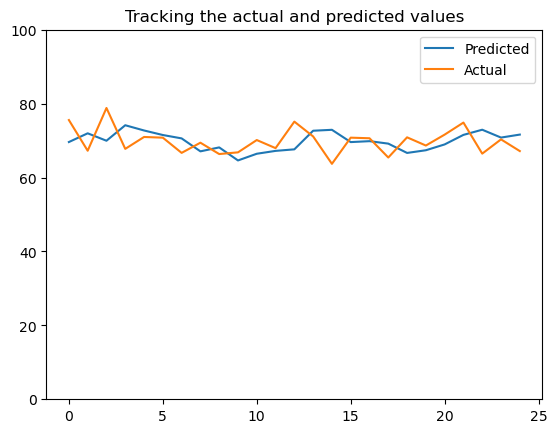

In [16]:
pred = [69.59956748525835, 71.96011976823415, 69.9518183702866, 74.1454855074901, 72.72686638353218, 71.5, 70.58694590108897, 67.07988826850459, 68.14773324804752, 64.61943253298135, 66.42995870743968, 67.2064764502748, 67.62303727106982, 72.65865526904082, 72.90916826328808, 69.58479618835617, 69.83417999971644, 69.17118373540164, 66.65180214798073,  67.37771812605517,  68.95414991935064, 71.53583405099427, 72.93126566152911, 70.80764767463378, 71.61473868999423]

plt.plot(pred)
plt.plot(actual)
plt.ylim(0,100)
plt.title("Tracking the actual and predicted values")
plt.legend(["Predicted","Actual"])
plt.show()

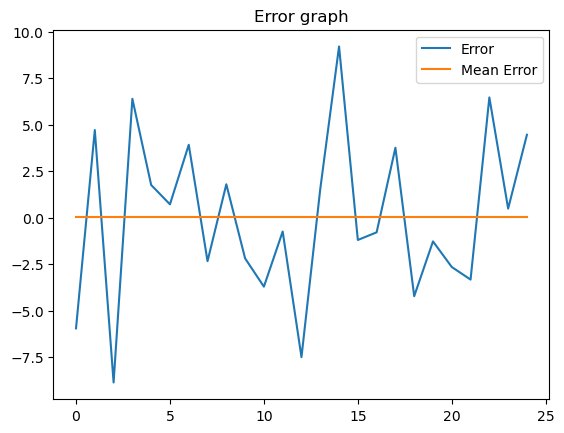

In [17]:
plt.plot(pred-actual)
plt.plot(np.mean(pred-actual)*np.ones(25))
plt.title("Error graph")
plt.legend(["Error","Mean Error"])
plt.show()

In [ ]:
import pickle
arima_fit.save('arima_model.pkl')